<a href="https://colab.research.google.com/github/dnf6541/ME592HW1_MINSOOOH/blob/main/HW1_2_2_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('energydata_complete.csv')

In [3]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,1/11/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433
1,1/11/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195
2,1/11/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668
3,1/11/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390
4,1/11/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,5/27/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812
19731,5/27/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940
19732,5/27/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117
19733,5/27/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784


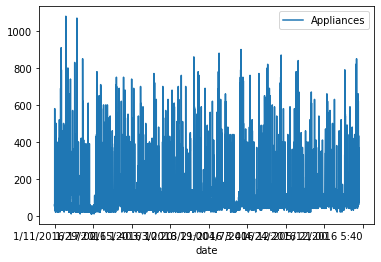

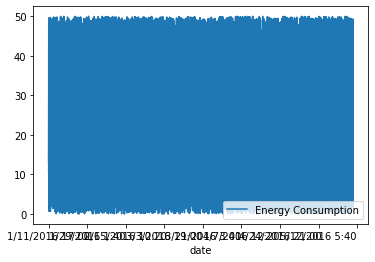

In [4]:
df.plot.line(x='date', y='Appliances')
df.plot.line(x='date', y='Energy Consumption')

In [5]:
format = '%m/%d/%Y %H:%M'
a = df.shape[0]
i = 0
while i < a:
  df.date[i] = datetime.datetime.strptime(df.date[i], format)
  i = i+1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
df['dateweek'] = 1
i=0
while i < a:
  k = df.date[i].isocalendar()
  df.dateweek[i] = k[1]
  i = i+1
df.dateweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0         2
1         2
2         2
3         2
4         2
         ..
19730    21
19731    21
19732    21
19733    21
19734    21
Name: dateweek, Length: 19735, dtype: int64

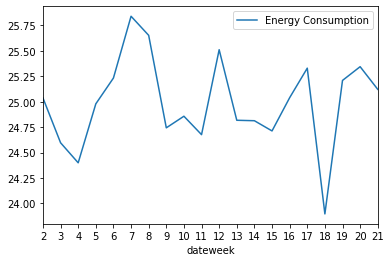

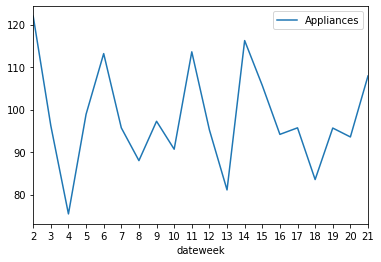

In [7]:
#1.1Average energy consumption by week 
t = df.groupby(df['dateweek']).mean()
t.plot.line(y='Energy Consumption')
plt.xlim([2, 21])
plt.xticks([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.show()
t.plot.line(y='Appliances')
plt.xlim([2, 21])
plt.xticks([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.show()

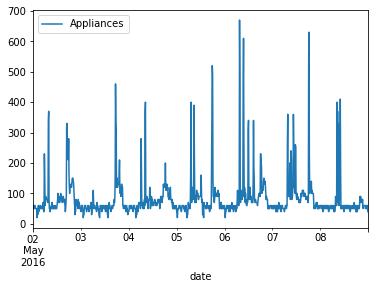

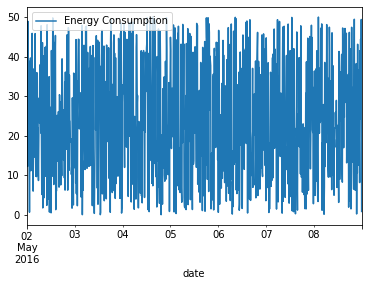

In [8]:
#1.2 A closer look at any one week of consumption(18 week, which has the minumum weekly average energy consumption)
minumweek = df[df.dateweek == 18]
minumweek.plot.line(x='date', y='Appliances')
minumweek.plot.line(x='date', y='Energy Consumption')

In [9]:
# 2 Plot heatmap of hourly consumption of appliances for 18 week
## Hour and weekday marking
minumweek['date'] = pd.to_datetime(minumweek['date'], format = '%Y-%m-%d %H:%M:%S')
minumweek['Hour of Day'] = minumweek['date'].dt.hour
minumweek['Day of Week'] = 'Mon'
### Days table
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
i = 16026
a = 17033
while i < a:
  minumweek['Day of Week'][i] = str(days[minumweek['date'][i].weekday()])
  i = i+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Text(0.5, 1.0, 'Heatmap of Appliances')

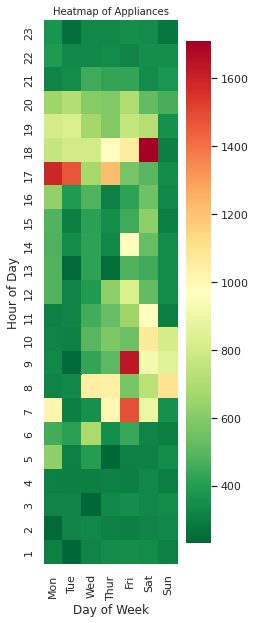

In [10]:
# Heatmap_Appliances
grp_s_d = minumweek.groupby(['Hour of Day', 'Day of Week'])[['Appliances']].sum()
grp_s_d.reset_index(inplace=True)
heatmaps = grp_s_d.pivot(index='Hour of Day', columns='Day of Week', values='Appliances')
heatmaps = heatmaps.reindex(columns= ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], index = [23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,12,11,10,9,8,7,6,5,4,3,2,1])
sns.set(rc = {'figure.figsize':(3,10)})
ax = sns.heatmap(heatmaps, yticklabels=1, cmap='RdYlGn_r')
plt.title('Heatmap of Appliances', fontsize=10)



Text(0.5, 1.0, 'Heatmap of Energy Consumption')

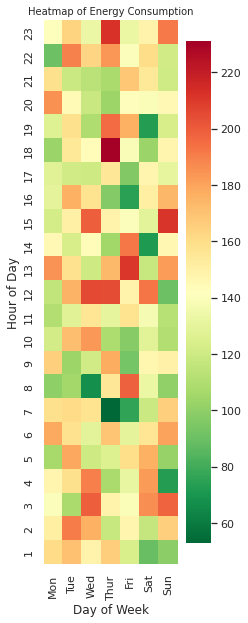

In [11]:
# Heatmap_Appliances
grp_s_d = minumweek.groupby(['Hour of Day', 'Day of Week'])[['Energy Consumption']].sum()
grp_s_d.reset_index(inplace=True)
heatmaps = grp_s_d.pivot(index='Hour of Day', columns='Day of Week', values='Energy Consumption')
heatmaps = heatmaps.reindex(columns= ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], index = [23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,12,11,10,9,8,7,6,5,4,3,2,1])
sns.set(rc = {'figure.figsize':(3,10)})
ax = sns.heatmap(heatmaps, yticklabels=1, cmap='RdYlGn_r')
plt.title('Heatmap of Energy Consumption', fontsize=10)


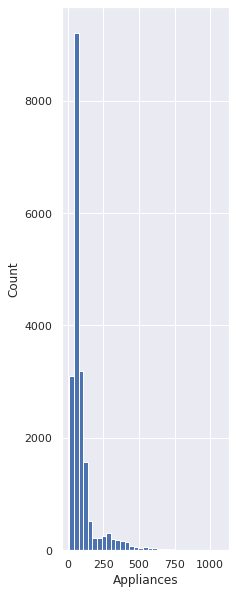

In [12]:
#2.3 Plot the histogram of enery consumption of appliances
plt.hist(df['Appliances'],  bins = 33)
plt.xlabel('Appliances')
plt.ylabel('Count')
plt.show()


In [13]:
#2.4 Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM
import time 
from datetime import timedelta

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')
df['time'] = df['date'].dt.time
i = 0
a = df.shape[0]
df['NSM'] = 0
df['Weekday'] = 0
while i < a:
  l = df['time'][i].hour
  m = df['time'][i].minute
  he = df['date'][i]
  totaltime = timedelta(hours = l, minutes = m)
  df['NSM'][i] = totaltime.total_seconds()
  df['Weekday'][i] = he.weekday()
  i = i + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
#Set a random day 
newdf = df[df.Weekday == 3][df.dateweek == 3]
newdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption,dateweek,time,NSM,Weekday
1338,2016-01-21 00:00:00,60,0,19.760000,38.126667,19.290000,37.863333,18.700000,39.700000,19.260000,38.000000,16.890000,58.000000,0.600000,96.763333,16.200000,33.483333,19.705000,45.163333,15.890000,40.500000,0.000,761.800000,88.000000,2.000000,61.000000,-1.80,49.286445,3,00:00:00,0,3
1339,2016-01-21 00:10:00,50,0,19.700000,38.260000,19.200000,37.900000,18.700000,39.645000,19.133333,38.000000,16.817778,57.927778,0.600000,96.800000,16.200000,33.500000,19.700000,45.462778,15.890000,40.626667,-0.167,761.866667,88.333333,2.000000,60.166667,-1.90,13.987128,3,00:10:00,600,3
1340,2016-01-21 00:20:00,40,0,19.666667,38.290000,19.133333,37.900000,18.700000,39.700000,18.963333,37.900000,16.790000,57.893889,0.600000,96.800000,16.200000,33.555000,19.700000,45.702778,15.890000,40.760000,-0.333,761.933333,88.666667,2.000000,59.333333,-2.00,6.174585,3,00:20:00,1200,3
1341,2016-01-21 00:30:00,20,0,19.600000,38.290000,19.066667,38.000000,18.700000,39.663333,18.823333,37.900000,16.790000,57.851111,0.666667,96.866667,16.200000,33.590000,19.700000,45.993333,15.890000,40.900000,-0.500,762.000000,89.000000,2.000000,58.500000,-2.10,8.718952,3,00:30:00,1800,3
1342,2016-01-21 00:40:00,30,0,19.566667,38.433333,19.000000,38.060000,18.633333,39.590000,18.700000,38.000000,16.715000,57.790000,0.666667,96.933333,16.200000,33.590000,19.700000,46.293333,15.890000,40.966667,-0.667,762.066667,89.333333,2.000000,57.666667,-2.20,44.066763,3,00:40:00,2400,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,2016-01-21 23:10:00,30,0,20.700000,36.900000,20.000000,36.400000,20.033333,40.326667,17.100000,37.863333,17.993889,42.201111,-2.163333,93.823333,16.700000,31.307778,19.550000,42.810556,15.890000,39.663333,-0.500,764.850000,89.666667,2.333333,59.333333,-2.03,20.749866,3,23:10:00,83400,3
1478,2016-01-21 23:20:00,50,0,20.633333,36.826667,19.963333,36.500000,19.856667,40.260000,17.100000,37.933333,17.902222,42.564444,-2.030000,94.230000,16.677778,31.438333,19.511111,42.982222,15.890000,39.790000,-0.400,764.900000,89.333333,2.666667,59.666667,-1.97,34.494608,3,23:20:00,84000,3
1479,2016-01-21 23:30:00,50,0,20.600000,36.826667,19.865000,36.475000,19.730000,40.260000,17.100000,38.000000,17.873333,42.847778,-1.900000,94.500000,16.700000,31.594444,19.516667,43.208333,15.963333,39.863333,-0.300,764.950000,89.000000,3.000000,60.000000,-1.90,35.846044,3,23:30:00,84600,3
1480,2016-01-21 23:40:00,40,0,20.600000,36.900000,19.790000,36.466667,19.700000,40.290000,17.000000,37.900000,17.780000,43.026111,-1.872500,94.592500,16.700000,31.715000,19.500000,43.403333,15.890000,39.933333,-0.200,765.000000,88.666667,3.333333,60.333333,-1.83,0.618958,3,23:40:00,85200,3


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


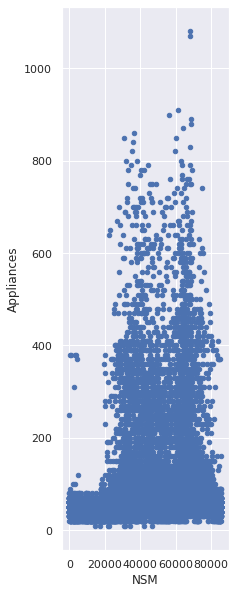

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


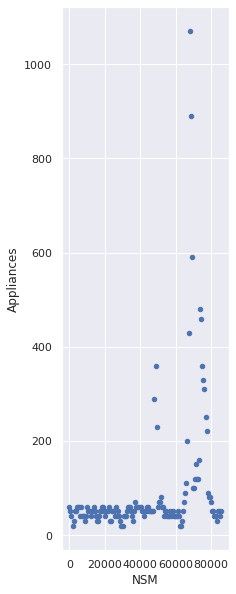

In [15]:
df.plot.scatter(x = 'NSM', y='Appliances')
plt.show()
newdf.plot.scatter(x = 'NSM', y='Appliances')
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


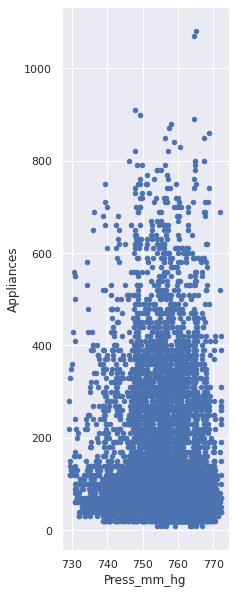

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


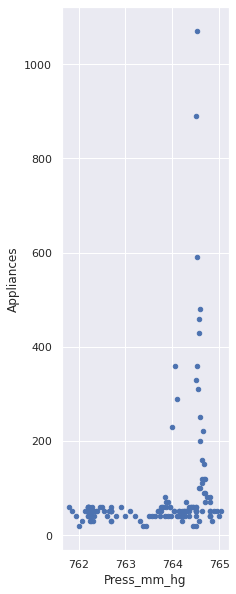

In [16]:
df.plot.scatter(x = 'Press_mm_hg', y='Appliances')
plt.show()
newdf.plot.scatter(x = 'Press_mm_hg', y='Appliances')
plt.show()

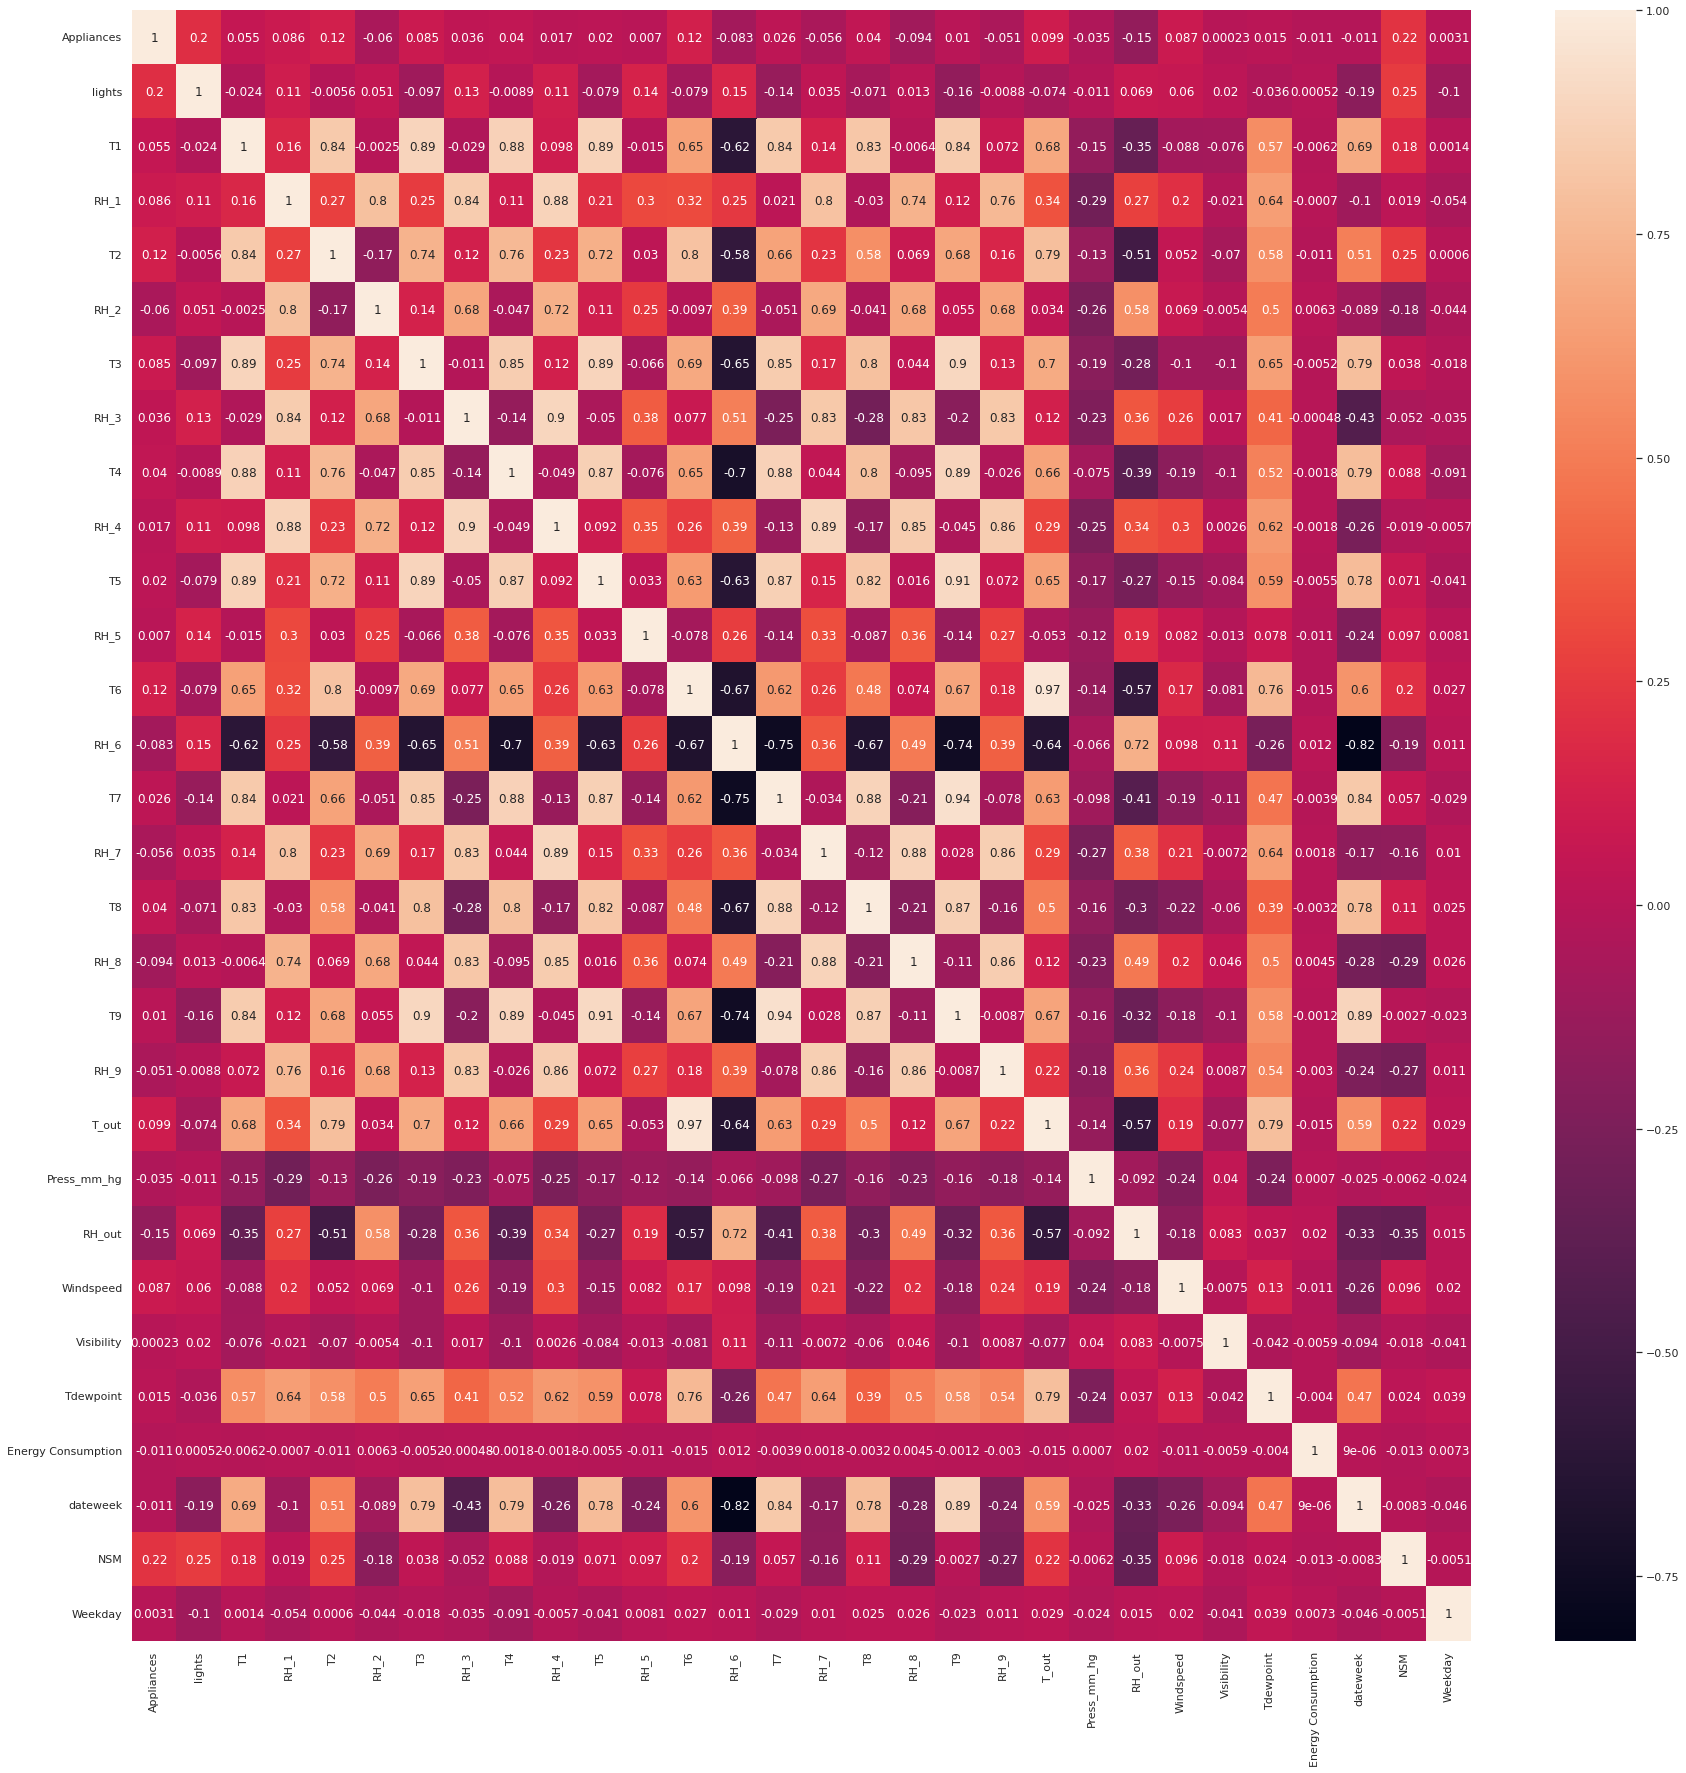

In [17]:
#2.6 To verify NSM and Press_mm_Hg the correlation matrix is drawn as below. NSM is selected a significant factor having an impact on energy consumption, but the absoulute value of Press_mm_Hg's coefficient was less than light, RH_out, and etc..

corrMatrix = df.corr()
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
# Therefore, three ways applied in determining the most important factor among various factors
# 1. Cofficients, 2. tree-based model, 3. PCA loading score
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['Appliances','date', 'time', 'Weekday', 'dateweek'], axis=1)
y = df['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [19]:
#1. Cofficients

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


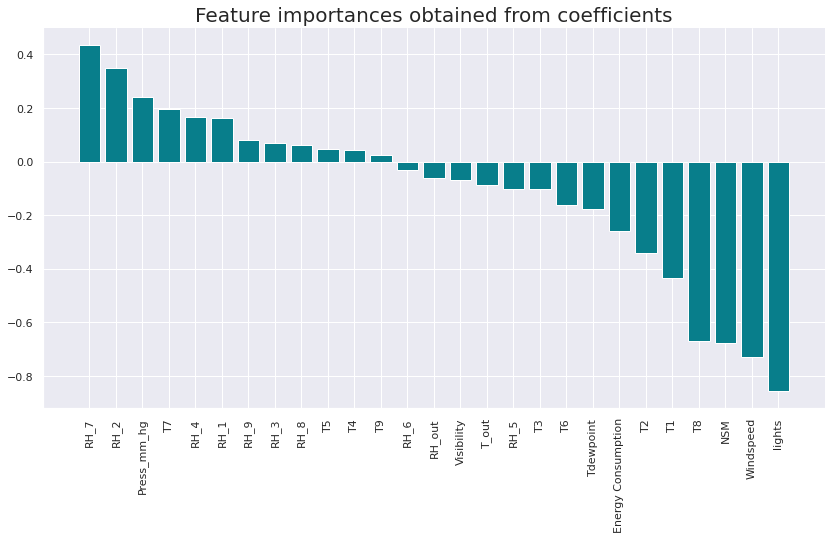

In [20]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

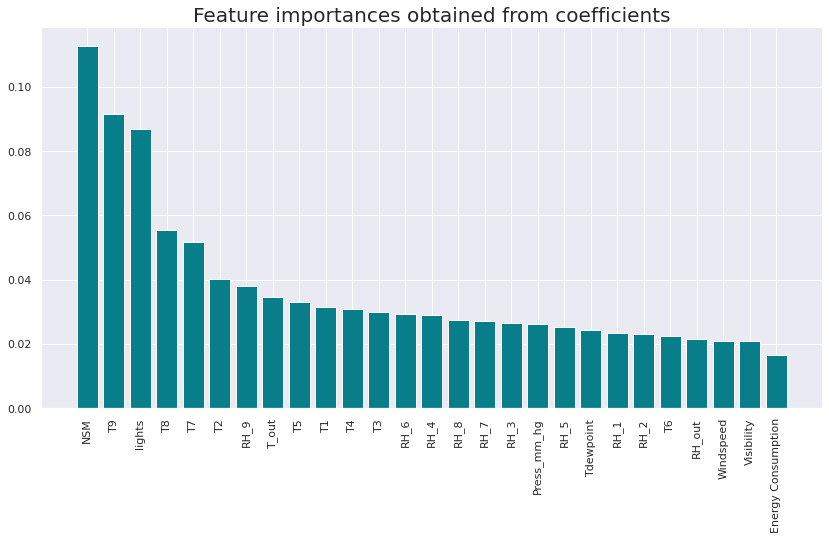

In [21]:
#2. Tree-based model
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


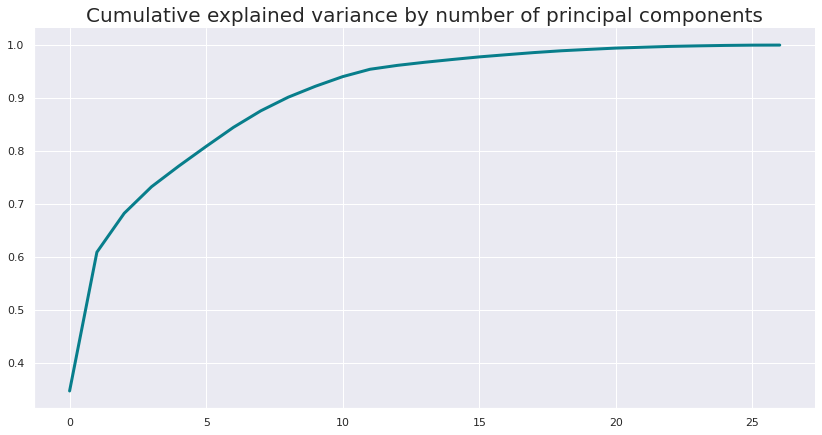

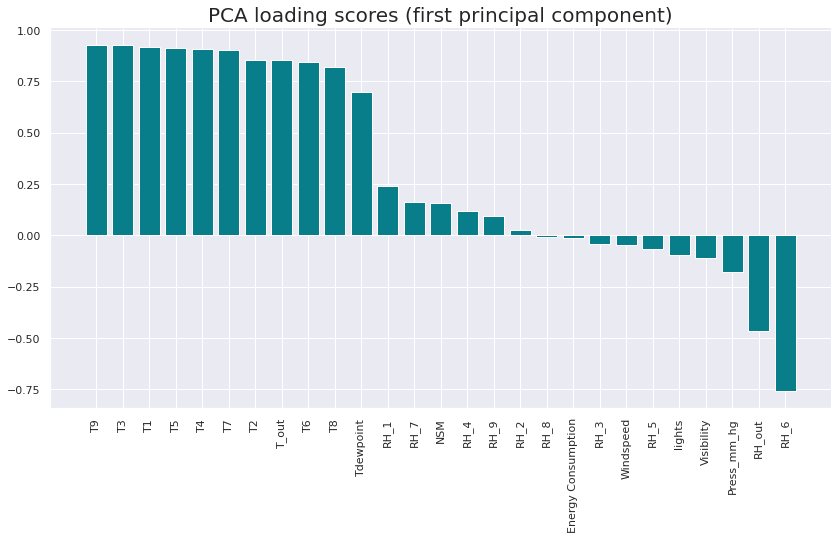

In [22]:
#3. PCA
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()


In [23]:
# 2.6 Conclusion 
# In the reference paper ("Data driven prediction models of energy use of appliances in a low-energy house (2017)"), 
# RF, GBM, and SVM were utilized for picking up the major contributing factors
# However, I utilized Cofficients, Tree-based, and PCA to conduct it. As a result, it is true that NSM and Press_mm_Hg are the major contributing factors,
# although the other factors, like light or Windspeed, have also significant impact on "Appliances".  